<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

Загрузим датасет о ценах на дома в Бостоне. 

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [3]:
import numpy as np
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2э
np.dot(x1, x2)

234704.86490859918

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

        - CRIM     Уровень преступности на душу населения по городам
        - ZN       доля жилой земли, зонированной для участков площадью более 25 000 кв. м.футов.
        - INDUS    доля не-розничного бизнеса акров в городе
        - CHAS     Наличие рядом реки
        - NOX      Концентрация оксидов азота NOX (частей на 10 млн.)
        - RM       среднее количество комнат в жилом помещении
        - AGE      Возрастная доля занятых владельцами объектов, построенных до 1940 года
        - DIS      расстояния до пяти бостонских центров занятости
        - RAD      индекс доступности к радиальным магистралям
        - TAX      Налог на полную стоимость недвижимости-ставка налога за $ 10,000
        - PTRATIO  соотношение учеников и учителей по городам
        - B        доля чернокожих по городам
        - LSTAT    % более низкий статус населения
        - MEDV     медианная стоимость занимаемых владельцами домов в $1000

In [27]:
df = pd.DataFrame(boston.data) # естественно график интерактивный)
df.columns = list(boston['feature_names'])
df['MEDV']= list(boston['target'])
import plotly.express as px
fig = px.scatter_3d(df, x='DIS', y='NOX', z='MEDV', size = 'RM', size_max=10, opacity=0.9)
fig.show()
print('на графике можно увидеть четко выраженную связь между близостью к бостонским центрам и концентрацией оксида азота')

на графике можно увидеть четко выраженную связь между близостью к бостонским центрам и концентрацией оксида азота


Найти косинус угла между векторами x1 и x2

Косинус угла между векторами равен скалярное произведение векторов поделить на произведение их длин. 

для начала нужно найти длину вектора, длина вектора, это корень из суммы каждой из его координат. 



In [25]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [26]:
ans1 = 0
for i in x1:
    ans1 +=i*i 
print(f'длина первого вектора ={ans1}')
ans2 = 0
for i in x2:
    ans2 +=i*i
print(f'длина второго вектора ={ans2}')
scal = np.dot(x1, x2)
print(f'скалярное произведение векторов ={scal}')
print(f'коснус угла между векторами равен ={scal/(ans1*ans2)}')

длина первого вектора =250046.12470894237
длина второго вектора =222839.30653024607
скалярное произведение векторов =234704.86490859918
коснус угла между векторами равен =4.212211459027514e-06


Найти расстояние между точками x1 и x2.

расстояние между точками равно сумме разности квадратов под корнем
$$\sqrt{(x_b - x_a)^2 + (y_b - y_a)^2 + (z_b - z_a)^2}$$

поэтому напишем формулу которая всё это дело посчитает


In [45]:
print(f' расстояние между точками x1 X2 = {round(sum((x1-x2)**2)**0.5,2)}')

 расстояние между точками x1 X2 = 58.96


# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

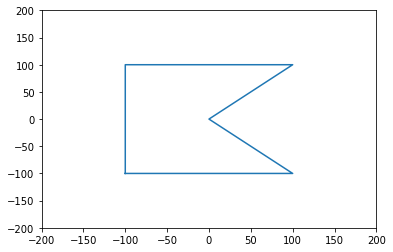

In [59]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

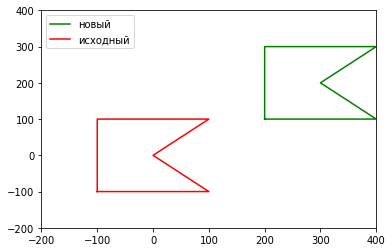

In [70]:
B = A+[300,200,0]
B = np.array(B)
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='g')
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 400])
plt.xlim([-200, 400])
plt.legend(['новый', 'исходный'])

Уменьшить объект в два раза.

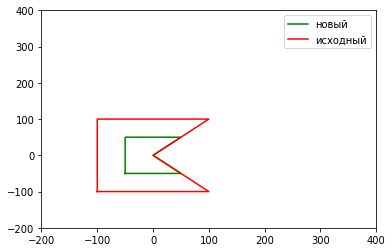

In [71]:
B = A/2
B = np.array(B)
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='g')

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 400])
plt.xlim([-200, 400])
plt.legend(['новый', 'исходный'])

Повернуть на 130 градусов.

In [72]:
from math import cos, sin, pi

theta = 30 * 130/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

In [73]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[ 134   42    1]
 [  42 -134    1]
 [-134  -42    1]
 [   0    0    1]
 [ -42  134    1]
 [ 134   42    1]]


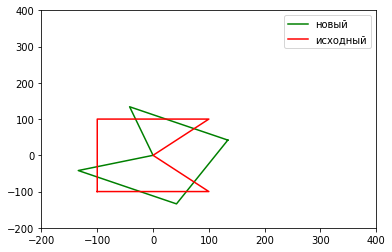

In [74]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='g')

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 400])
plt.xlim([-200, 400])
plt.legend(['новый', 'исходный'])

Отразить объект относительно прямой y=x

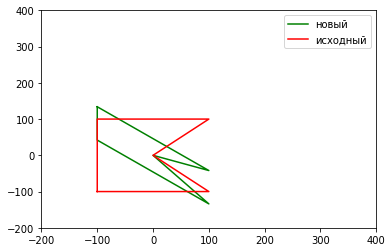

In [75]:
y = B[:,0]
b = B[:,1]
plt.plot(x, y, color='g')

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 400])
plt.xlim([-200, 400])
plt.legend(['новый', 'исходный'])